In [18]:
import time
import pandas as pd
from bs4 import BeautifulSoup
import requests
import re
from PIL import Image
from io import BytesIO


In [13]:
import faiss
from transformers import CLIPProcessor, CLIPModel

In [19]:
import chromadb
chroma_client = chromadb.Client()

try:
    collection = chroma_client.get_collection(name="all_clothes")
except:
    collection = chroma_client.create_collection(name="all_clothes")

In [20]:
import sys
#sys.path.append("fashion-clip/")
from fashion_clip.fashion_clip import FashionCLIP
import pandas as pd
import numpy as np
from collections import Counter
from PIL import Image
import numpy as np
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.linear_model import LogisticRegression

In [16]:
fclip = FashionCLIP('fashion-clip')

In [21]:
# fclip = FashionCLIP('fashion-clip')
def img_vector(image):
    images =[]
    images.append(image)
    embeded_cloth = fclip.encode_images(images,batch_size=1)
    embeded_list = [float(x) for x in embeded_cloth[0]]
    
    return embeded_list # numpy.ndarray

In [27]:
def origin_run(goods_soup,img):
        # 카테고리
        category = goods_soup.find_all('p', attrs={'class': 'item_categories'})[0] # 대분류 이름
        category_id = category.get_text()
        category_detail = category_id.replace(' ', '').replace('\n', '').replace('(무신사스탠다드)', '').split('>') # 중분류 이름
        if(len(category.select('a')) <= 2):
            # continue
            return

        # 타이틀
        title_list.append(img['title'])
        url_list.append('https:' + img['href'])
        print(img['title'])
        # class
        price = goods_soup.find_all('span', attrs={'class': 'product_article_price'})[0] # 가격 정보
        price_list.append(re.sub(r'[^0-9]', '', price.get_text().split()[-1]))
        print(price)
        # 이미지 태그 추출
        image_tag = goods_soup.find('img', {'id': 'bigimg'})
        
        # 이미지 URL 추출
        image_url = image_tag['src']
        if not image_url.startswith('http:'):
            image_url = 'http:' + image_url
        
        # 이미지 다운로드
        image_response = requests.get(image_url)
        
        # 이미지 표시
        image = Image.open(BytesIO(image_response.content))
        # display(image)
        # 임베딩
        embeded_list = img_vector(image) # numpy.ndarray
        # chromadb - all_clothes 에 임베딩
        collection.add(
        # documents=["doc1"], # 비구조화된 추가정보
        embeddings=[embeded_list],
        metadatas=[{"title": str(img['title']), "price": str(price), "image":image_url}], # 구조화된 추가정보
        ids=[category_id] # 고유 식별자
        )

        print(start, "finish")

In [23]:
# def crawl(start, title_list, url_list, category_list, price_list, gender_list):
#전역
def crawl(start):
    print(start, " start")

    url = ('https://www.musinsa.com/brands/musinsastandard?category3DepthCodes=&category2DepthCodes'
           '=&category1DepthCode=&colorCodes=&startPrice=&endPrice=&exclusiveYn=&includeSoldOut=&saleGoods'
           '=&timeSale=&includeKeywords=&sortCode=emt_high&tags=&page={'
           '}&size=90&listViewType=small&campaignCode=&groupSale=&outletGoods=false&boutiqueGoods=').format(
        start)
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'lxml')

    for img in soup.find_all('a', attrs={'class': 'img-block'}):
        goods_num = img['href'].split('/')[-1]

        goods_url = 'https://www.musinsa.com/app/goods/{}'.format(goods_num)
        goods_response = requests.get(goods_url, headers={"User-Agent": "Chrome/39.0.2171.95"})
        goods_soup = BeautifulSoup(goods_response.text, 'lxml')

        # 상세 페이지 분류 시작
        origin_run(goods_soup,img)
        
    return


In [25]:
# 전역 변수
title_list=[]
url_list=[]
price_list=[]

In [ ]:
crawl(1) 

1  start
[힛탠다드 이벤트] [힛탠다드] 맨즈 크루 넥 티셔츠_이너 웨어 [블랙]
<span class="product_article_price">13,900</span>


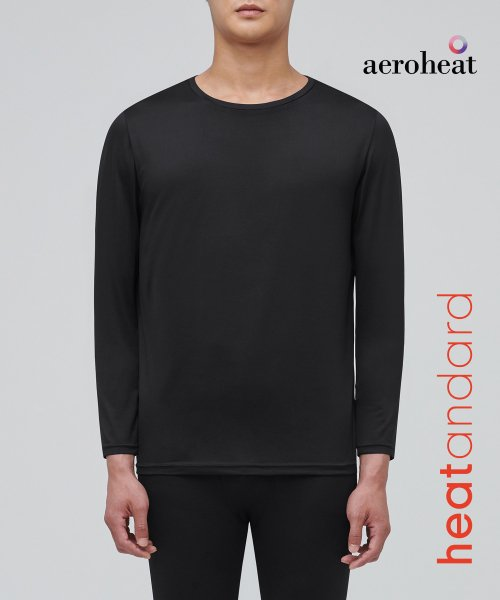

100%|██████████| 1/1 [00:00<00:00,  4.76it/s]


1 finish
사피아노 신세틱 레더 벨트
<span class="product_article_price" id="goods_price">
                                                                                                                                                15,900원
                    </span>


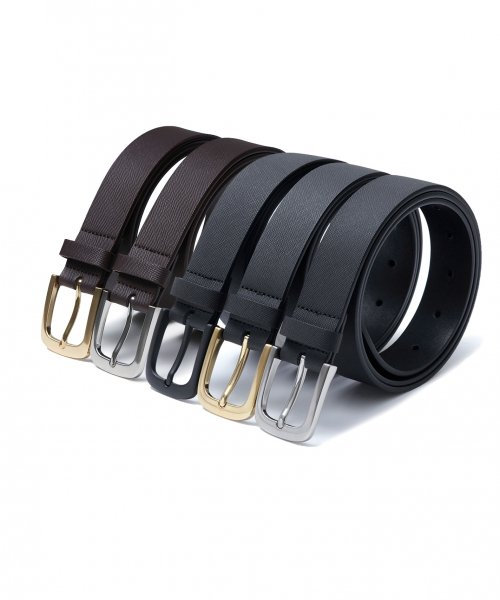

100%|██████████| 1/1 [00:00<00:00,  8.40it/s]


1 finish
[힛탠다드 이벤트] [힛탠다드] 맨즈 타이즈_이너 웨어 [블랙]
<span class="product_article_price">13,900</span>


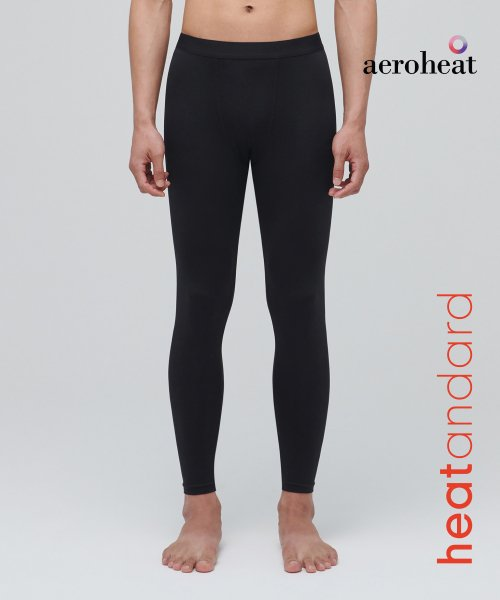

100%|██████████| 1/1 [00:00<00:00,  8.26it/s]
Insert of existing embedding ID: 
속옷 > 홈웨어

            (무신사 스탠다드)        

Add of existing embedding ID: 
속옷 > 홈웨어

            (무신사 스탠다드)        



1 finish
테이퍼드 히든 밴딩 크롭 슬랙스 [블랙]
<span class="product_article_price" id="goods_price">
<del class="price-del">39,900원</del>
</span>


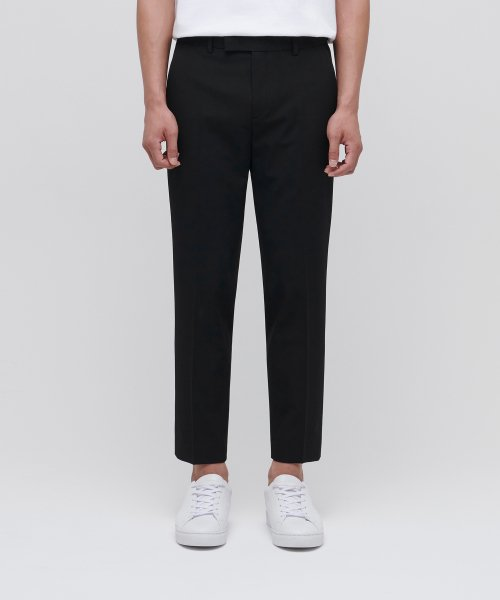

100%|██████████| 1/1 [00:00<00:00,  9.62it/s]


1 finish
세미 와이드 히든 밴딩 슬랙스 [블랙]
<span class="product_article_price" id="goods_price">
                                                                                                                                                39,900원
                    </span>


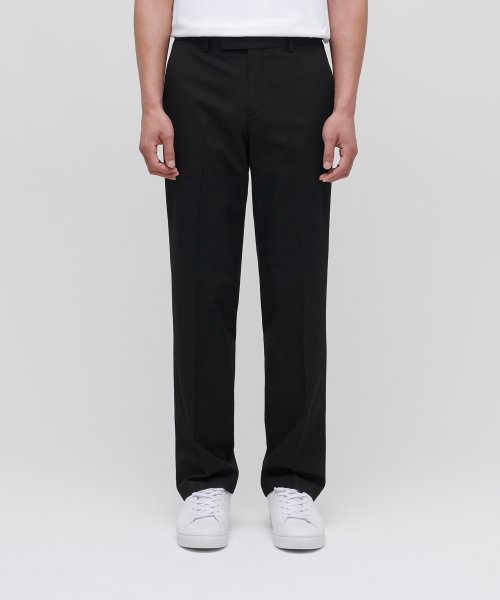

100%|██████████| 1/1 [00:00<00:00,  9.71it/s]
Insert of existing embedding ID: 
바지 > 슈트 팬츠/슬랙스

            (무신사 스탠다드)        

Add of existing embedding ID: 
바지 > 슈트 팬츠/슬랙스

            (무신사 스탠다드)        



1 finish
릴렉스 핏 크루 넥 반팔 티셔츠 [화이트]
<span class="product_article_price" id="goods_price">
                                                                                                                                                15,900원
                    </span>


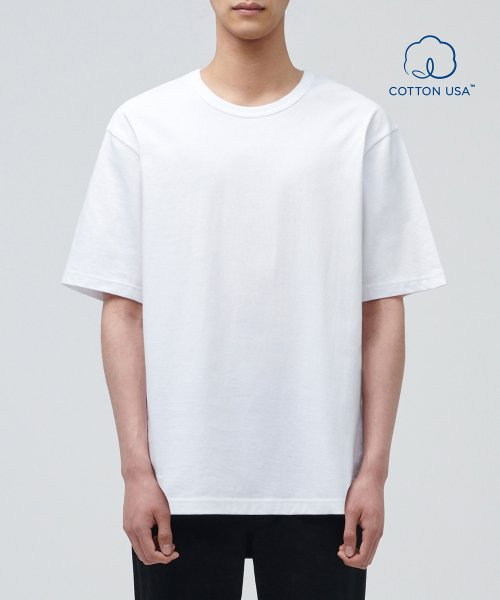

100%|██████████| 1/1 [00:00<00:00,  9.35it/s]


1 finish
와이드 히든 밴딩 슬랙스 [블랙]
<span class="product_article_price" id="goods_price">
                                                                                                                                                41,900원
                    </span>


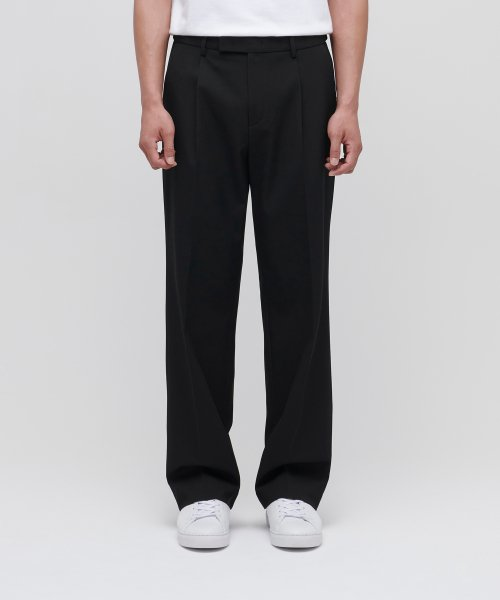

100%|██████████| 1/1 [00:00<00:00, 10.20it/s]
Insert of existing embedding ID: 
바지 > 슈트 팬츠/슬랙스

            (무신사 스탠다드)        

Add of existing embedding ID: 
바지 > 슈트 팬츠/슬랙스

            (무신사 스탠다드)        



1 finish
베이식 긴팔 티셔츠 [화이트]
<span class="product_article_price" id="goods_price">
                                                                                                                                                18,900원
                    </span>


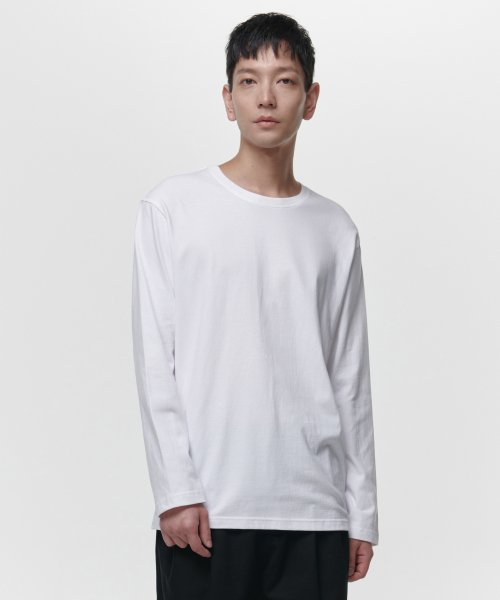

100%|██████████| 1/1 [00:00<00:00, 10.10it/s]


1 finish
라이트웨이트 크루 삭스 7팩 [화이트]
<span class="product_article_price" id="goods_price">
                                                                                                                                                19,900원
                    </span>


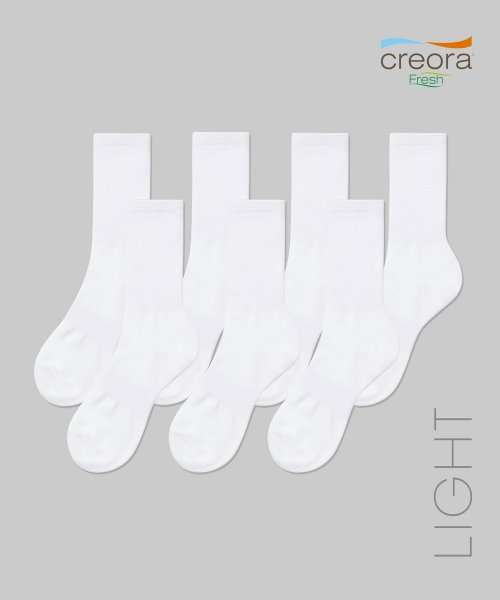

100%|██████████| 1/1 [00:00<00:00,  9.62it/s]


1 finish
맨즈 드로즈 3팩
<span class="product_article_price" id="goods_price">
                                                                                                                                                21,900원
                    </span>


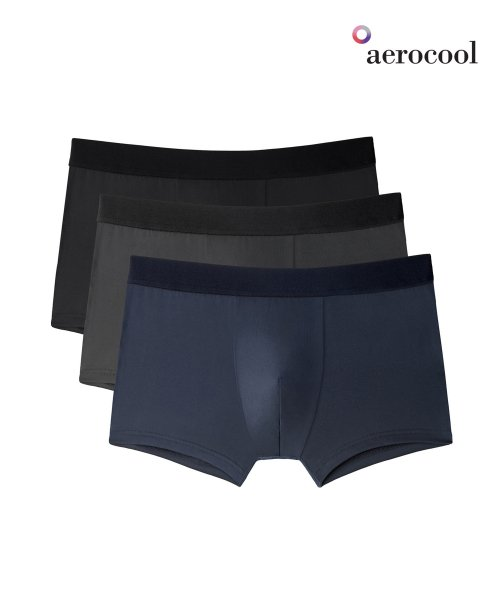

100%|██████████| 1/1 [00:00<00:00,  9.17it/s]


1 finish
와이드 히든 밴딩 슬랙스 [미디엄 그레이]
<span class="product_article_price" id="goods_price">
                                                                                                                                                41,900원
                    </span>


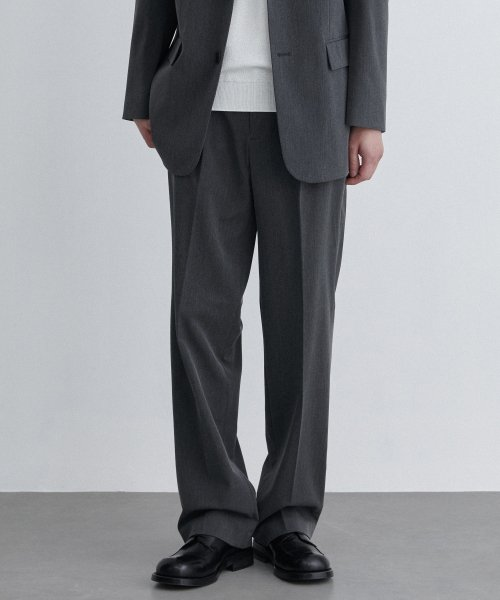

100%|██████████| 1/1 [00:00<00:00,  9.17it/s]
Insert of existing embedding ID: 
바지 > 슈트 팬츠/슬랙스

            (무신사 스탠다드)        

Add of existing embedding ID: 
바지 > 슈트 팬츠/슬랙스

            (무신사 스탠다드)        



1 finish
레이어드 크루 넥 반팔 티셔츠_일반 기장 [화이트]
<span class="product_article_price" id="goods_price">
                                                                                                                                                16,900원
                    </span>


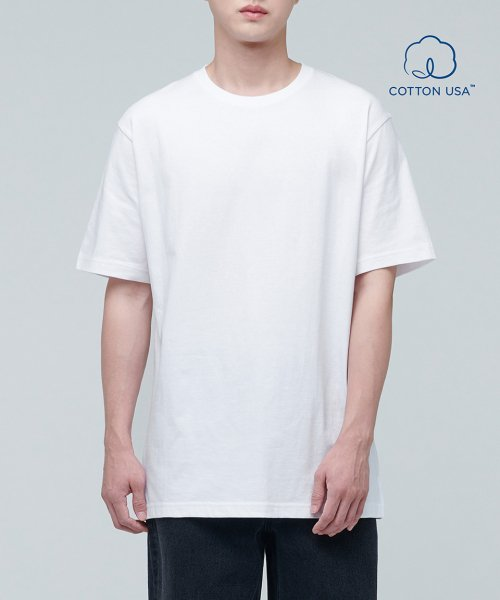

100%|██████████| 1/1 [00:00<00:00,  8.85it/s]
Insert of existing embedding ID: 
상의 > 반소매 티셔츠

            (무신사 스탠다드)        

Add of existing embedding ID: 
상의 > 반소매 티셔츠

            (무신사 스탠다드)        



1 finish
레이어드 크루 넥 반팔 티셔츠_긴 기장 [화이트]
<span class="product_article_price" id="goods_price">
                                                                                                                                                16,900원
                    </span>


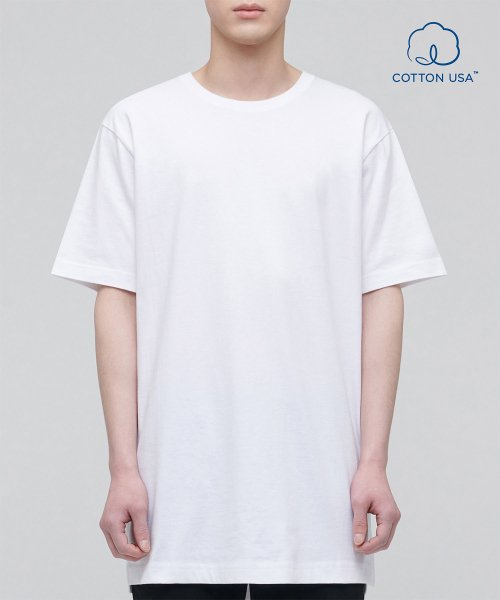

100%|██████████| 1/1 [00:00<00:00,  7.81it/s]
Insert of existing embedding ID: 
상의 > 반소매 티셔츠

            (무신사 스탠다드)        

Add of existing embedding ID: 
상의 > 반소매 티셔츠

            (무신사 스탠다드)        



1 finish
베이식 블레이저 [블랙]
<span class="product_article_price" id="goods_price">
<del class="price-del">79,900원</del>
</span>


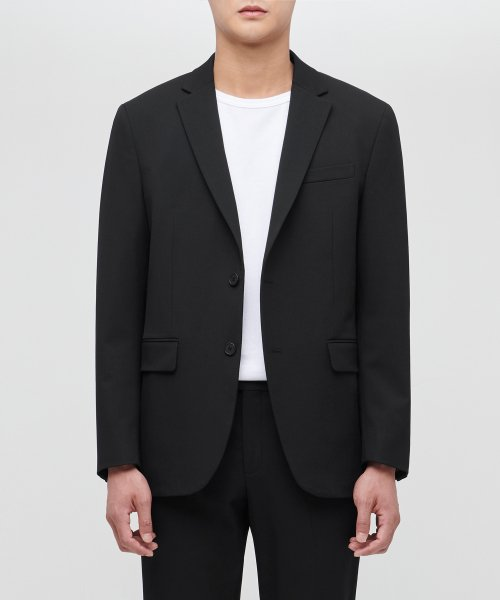

100%|██████████| 1/1 [00:00<00:00,  8.70it/s]


1 finish
릴렉스 핏 크루 넥 반팔 티셔츠 [블랙]
<span class="product_article_price" id="goods_price">
                                                                                                                                                15,900원
                    </span>


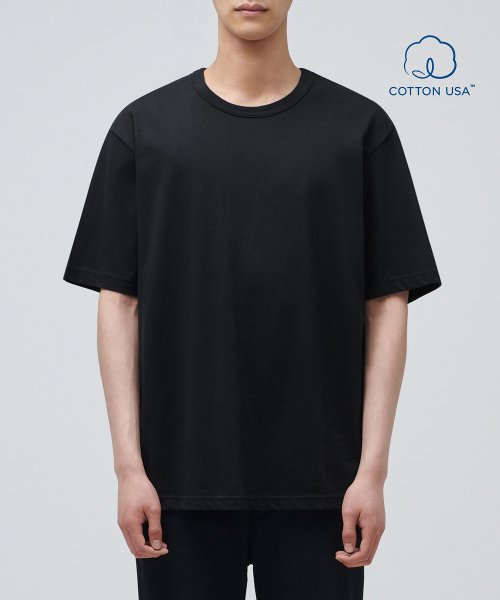

100%|██████████| 1/1 [00:00<00:00,  8.47it/s]
Insert of existing embedding ID: 
상의 > 반소매 티셔츠

            (무신사 스탠다드)        

Add of existing embedding ID: 
상의 > 반소매 티셔츠

            (무신사 스탠다드)        



1 finish
베이식 긴팔 티셔츠 2팩
<span class="product_article_price" id="goods_price">
                                                                                                                                                37,800원
                    </span>


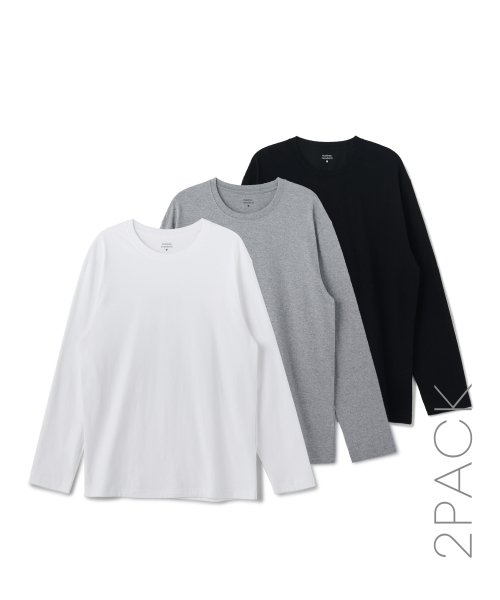

100%|██████████| 1/1 [00:00<00:00,  9.52it/s]
Insert of existing embedding ID: 
상의 > 긴소매 티셔츠

            (무신사 스탠다드)        

Add of existing embedding ID: 
상의 > 긴소매 티셔츠

            (무신사 스탠다드)        



1 finish
베이식 긴팔 티셔츠 [블랙]
<span class="product_article_price" id="goods_price">
                                                                                                                                                18,900원
                    </span>


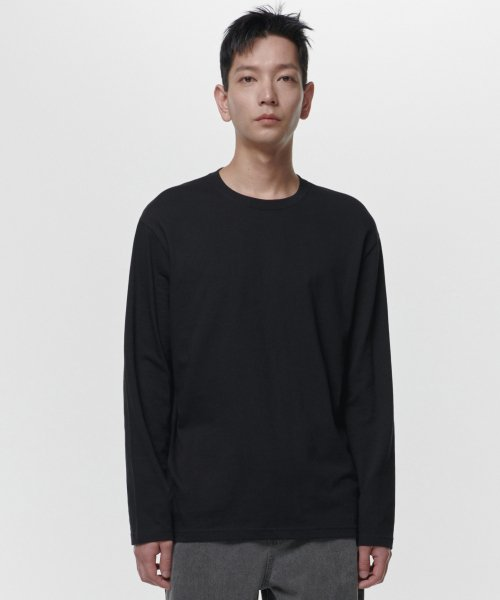

100%|██████████| 1/1 [00:00<00:00,  5.99it/s]
Insert of existing embedding ID: 
상의 > 긴소매 티셔츠

            (무신사 스탠다드)        

Add of existing embedding ID: 
상의 > 긴소매 티셔츠

            (무신사 스탠다드)        



1 finish
브이넥 라이트 다운 베스트 [블랙]
<span class="product_article_price" id="goods_price">
<del class="price-del">49,900원</del>
</span>


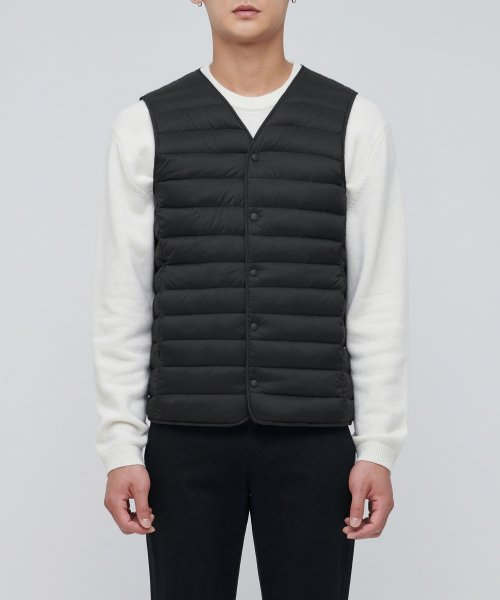

100%|██████████| 1/1 [00:00<00:00, 10.42it/s]


1 finish
릴렉스드 베이식 블레이저 [블랙]
<span class="product_article_price" id="goods_price">
<del class="price-del">81,900원</del>
</span>


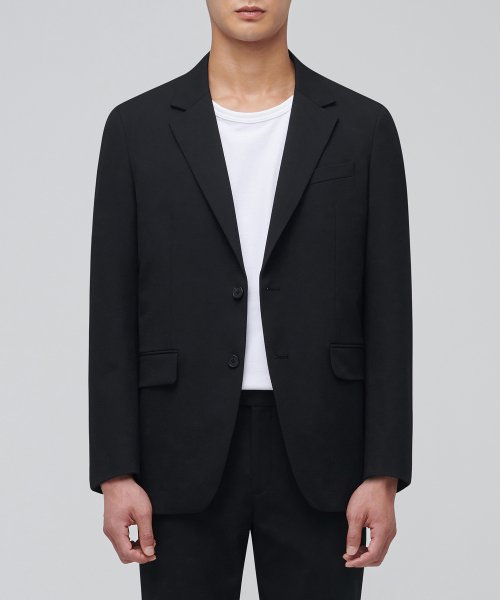

100%|██████████| 1/1 [00:00<00:00,  9.52it/s]
Insert of existing embedding ID: 
아우터 > 슈트/블레이저 재킷

            (무신사 스탠다드)        

Add of existing embedding ID: 
아우터 > 슈트/블레이저 재킷

            (무신사 스탠다드)        



1 finish
[쿨탠다드] 맨즈 드로즈 3팩
<span class="product_article_price" id="goods_price">
                                                                                                                                                27,900원
                    </span>


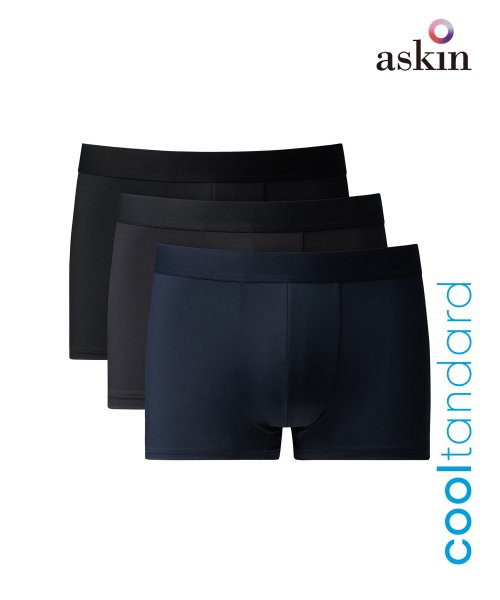

100%|██████████| 1/1 [00:00<00:00,  8.33it/s]
Insert of existing embedding ID: 
속옷 > 남성 속옷

            (무신사 스탠다드)        

Add of existing embedding ID: 
속옷 > 남성 속옷

            (무신사 스탠다드)        



1 finish
라이트웨이트 크루 삭스 7팩 [블랙]
<span class="product_article_price" id="goods_price">
                                                                                                                                                19,900원
                    </span>


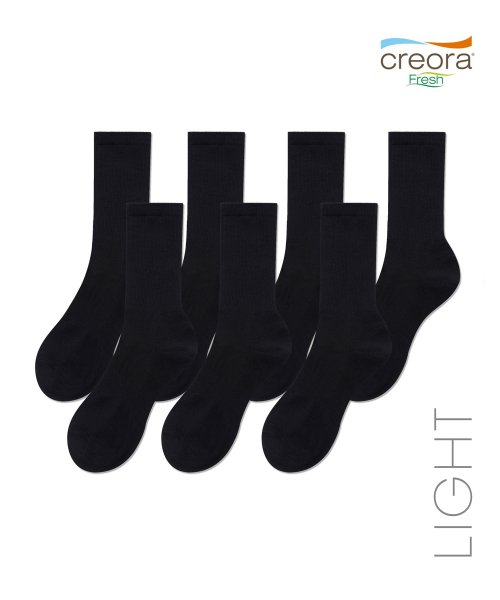

100%|██████████| 1/1 [00:00<00:00,  5.92it/s]
Insert of existing embedding ID: 
양말/레그웨어 > 양말

            (무신사 스탠다드)        

Add of existing embedding ID: 
양말/레그웨어 > 양말

            (무신사 스탠다드)        



1 finish
[논슬립 패드 5SET 증정] 무신사 스탠다드 상의용 옷걸이 10팩 [블랙]
<span class="product_article_price" id="goods_price">
                                                                                                                                                15,900원
                    </span>


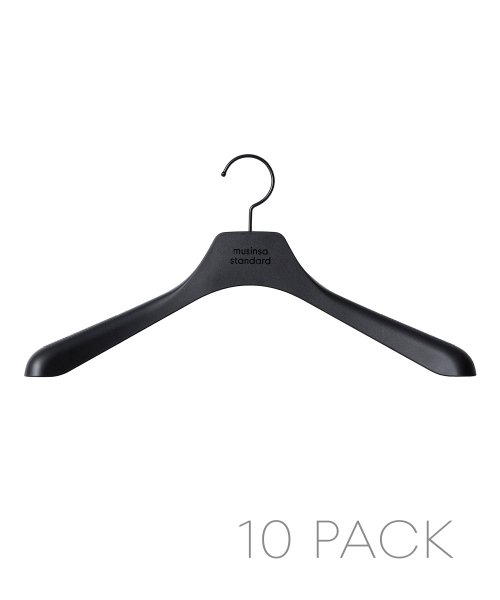

100%|██████████| 1/1 [00:00<00:00,  7.63it/s]


1 finish
크루 삭스 7팩 [블랙]
<span class="product_article_price" id="goods_price">
                                                                                                                                                22,900원
                    </span>


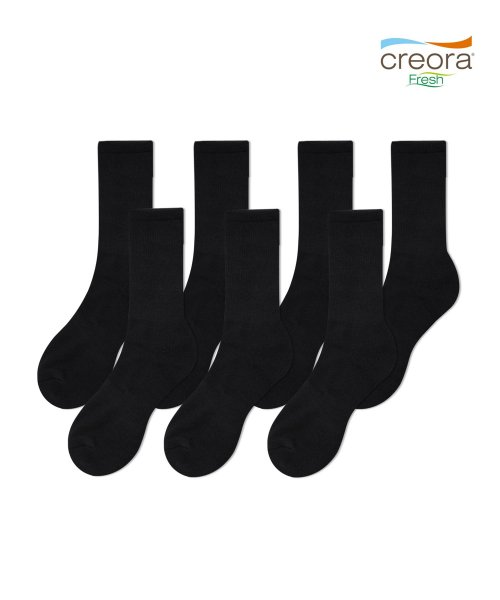

100%|██████████| 1/1 [00:00<00:00,  8.13it/s]
Insert of existing embedding ID: 
양말/레그웨어 > 양말

            (무신사 스탠다드)        

Add of existing embedding ID: 
양말/레그웨어 > 양말

            (무신사 스탠다드)        



1 finish
오버사이즈 블레이저 [블랙]
<span class="product_article_price" id="goods_price">
<del class="price-del">83,900원</del>
</span>


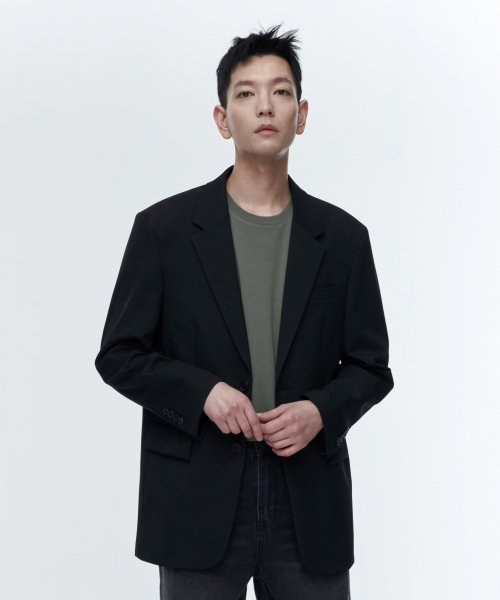

100%|██████████| 1/1 [00:00<00:00,  9.62it/s]
Insert of existing embedding ID: 
아우터 > 슈트/블레이저 재킷

            (무신사 스탠다드)        

Add of existing embedding ID: 
아우터 > 슈트/블레이저 재킷

            (무신사 스탠다드)        



1 finish
릴렉스 핏 크루 넥 반팔 티셔츠 2팩
<span class="product_article_price" id="goods_price">
                                                                                                                                                31,800원
                    </span>


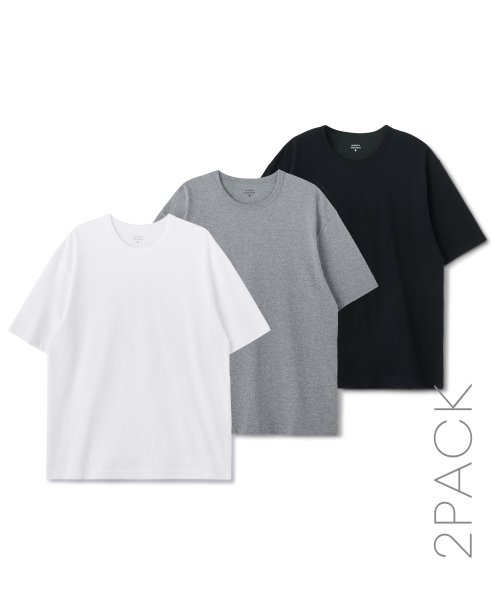

100%|██████████| 1/1 [00:00<00:00,  9.01it/s]
Insert of existing embedding ID: 
상의 > 반소매 티셔츠

            (무신사 스탠다드)        

Add of existing embedding ID: 
상의 > 반소매 티셔츠

            (무신사 스탠다드)        



1 finish
[힛탠다드 이벤트] [힛탠다드] 맨즈 크루 넥 티셔츠_이너 웨어 [화이트]
<span class="product_article_price">13,900</span>


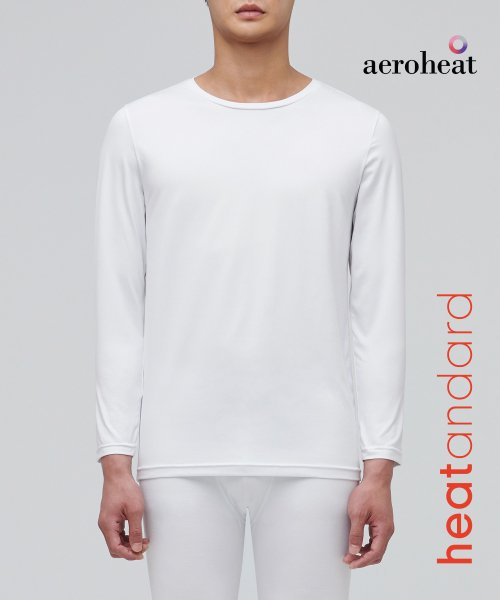

100%|██████████| 1/1 [00:00<00:00,  9.01it/s]
Insert of existing embedding ID: 
속옷 > 홈웨어

            (무신사 스탠다드)        

Add of existing embedding ID: 
속옷 > 홈웨어

            (무신사 스탠다드)        



1 finish
베이식 크루 넥 반팔 티셔츠 [화이트]
<span class="product_article_price" id="goods_price">
                                                                                                                                                13,900원
                    </span>


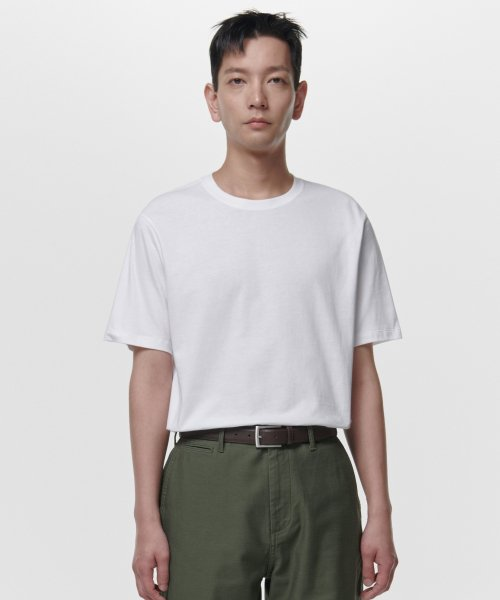

100%|██████████| 1/1 [00:00<00:00,  8.62it/s]
Insert of existing embedding ID: 
상의 > 반소매 티셔츠

            (무신사 스탠다드)        

Add of existing embedding ID: 
상의 > 반소매 티셔츠

            (무신사 스탠다드)        



1 finish
세미 와이드 히든 밴딩 슬랙스 [미디엄 그레이]
<span class="product_article_price" id="goods_price">
<del class="price-del">39,900원</del>
</span>


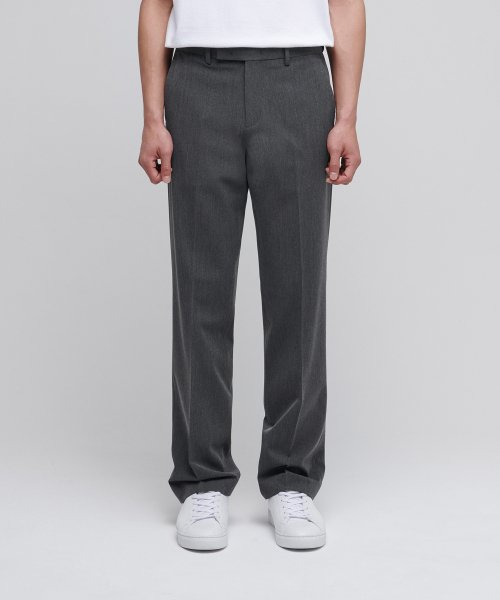

100%|██████████| 1/1 [00:00<00:00,  9.01it/s]
Insert of existing embedding ID: 
바지 > 슈트 팬츠/슬랙스

            (무신사 스탠다드)        

Add of existing embedding ID: 
바지 > 슈트 팬츠/슬랙스

            (무신사 스탠다드)        



1 finish
유틸리티 쇼츠 [블랙]
<span class="product_article_price" id="goods_price">
                                                                                                                                                23,900원
                    </span>


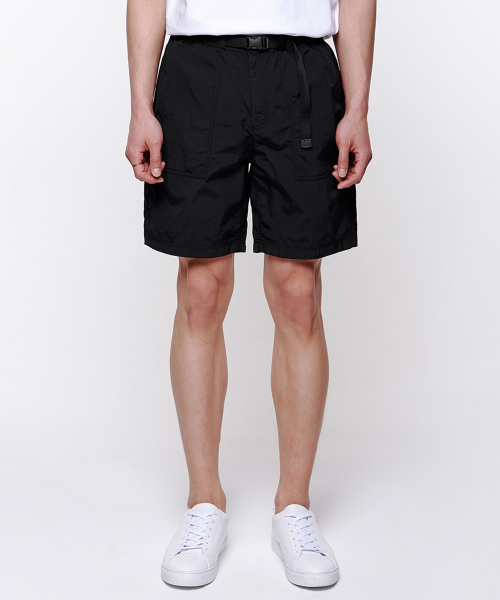

100%|██████████| 1/1 [00:00<00:00,  7.69it/s]


1 finish
라이트웨이트 미들 삭스 7팩 [화이트]
<span class="product_article_price" id="goods_price">
                                                                                                                                                19,900원
                    </span>


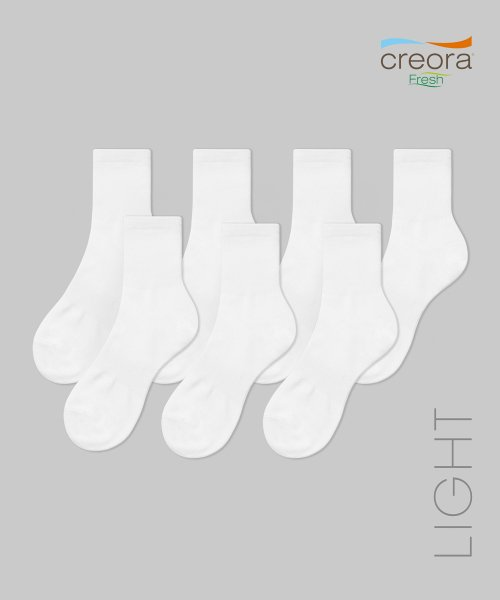

100%|██████████| 1/1 [00:00<00:00,  9.52it/s]
Insert of existing embedding ID: 
양말/레그웨어 > 양말

            (무신사 스탠다드)        

Add of existing embedding ID: 
양말/레그웨어 > 양말

            (무신사 스탠다드)        



1 finish
라운지 스웨트 팬츠 [블랙]
<span class="product_article_price" id="goods_price">
                                                                                                                                                31,900원
                    </span>


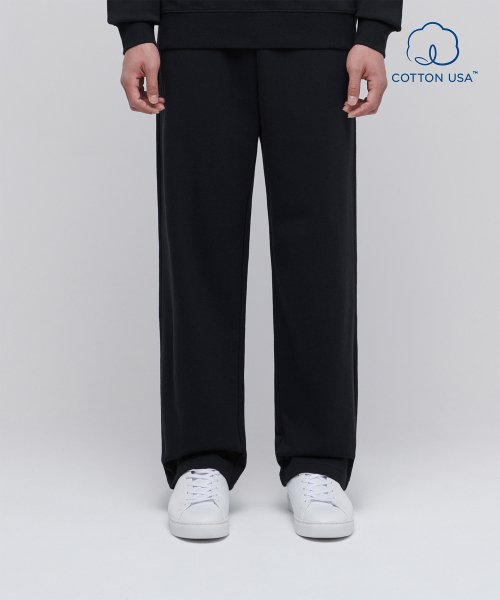

100%|██████████| 1/1 [00:00<00:00,  9.17it/s]


1 finish
폰테 크루 넥 긴팔 티셔츠 [오프 화이트]
<span class="product_article_price" id="goods_price">
                                                                                                                                                24,900원
                    </span>


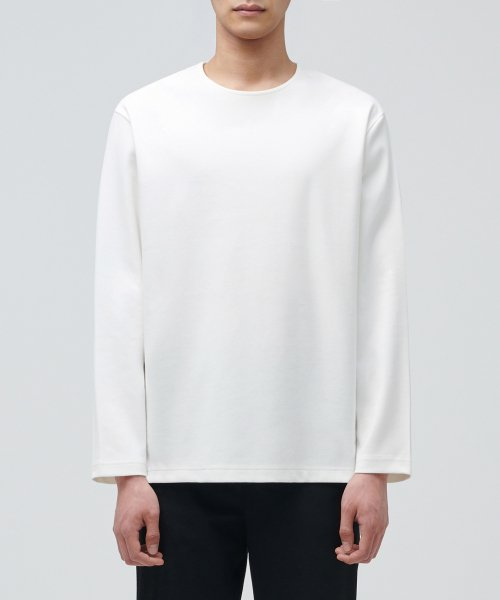

100%|██████████| 1/1 [00:00<00:00,  8.70it/s]
Insert of existing embedding ID: 
상의 > 긴소매 티셔츠

            (무신사 스탠다드)        

Add of existing embedding ID: 
상의 > 긴소매 티셔츠

            (무신사 스탠다드)        



1 finish
[힛탠다드 이벤트] [힛탠다드] 우먼즈 타이즈_이너 웨어 [블랙]
<span class="product_article_price">13,900</span>


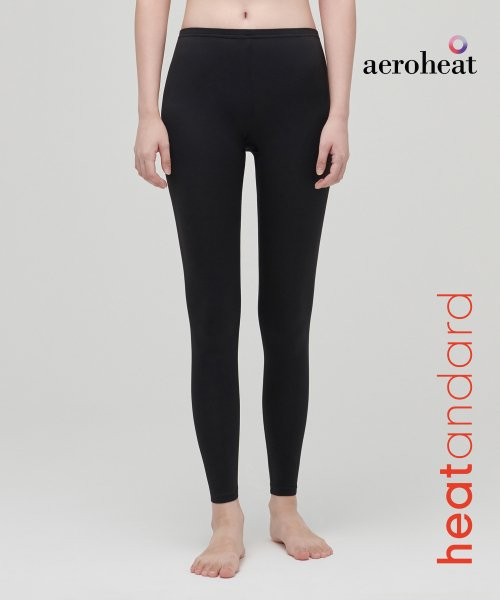

100%|██████████| 1/1 [00:00<00:00,  6.90it/s]
Insert of existing embedding ID: 
속옷 > 홈웨어

            (무신사 스탠다드)        

Add of existing embedding ID: 
속옷 > 홈웨어

            (무신사 스탠다드)        



1 finish
라운지 스웨트 팬츠 [멜란지 그레이]
<span class="product_article_price" id="goods_price">
                                                                                                                                                31,900원
                    </span>


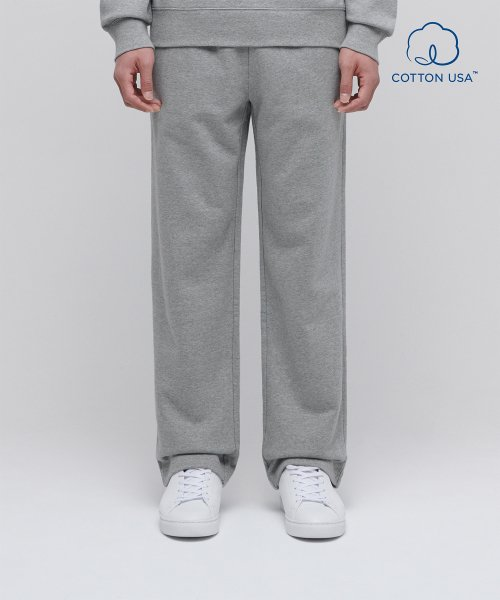

100%|██████████| 1/1 [00:00<00:00,  8.55it/s]
Insert of existing embedding ID: 
바지 > 트레이닝/조거 팬츠

            (무신사 스탠다드)        

Add of existing embedding ID: 
바지 > 트레이닝/조거 팬츠

            (무신사 스탠다드)        



1 finish
스웨트셔츠 [블랙]
<span class="product_article_price" id="goods_price">
                                                                                                                                                29,900원
                    </span>


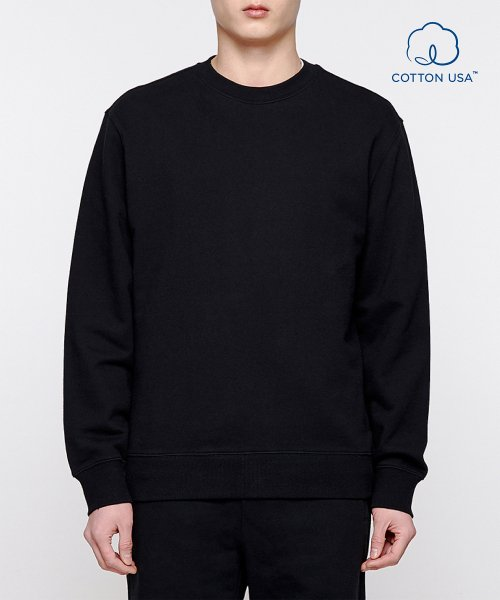

100%|██████████| 1/1 [00:00<00:00,  9.44it/s]


1 finish
우먼즈 베이식 크루 넥 반팔 티셔츠 [화이트]
<span class="product_article_price" id="goods_price">
                                                                                                                                                13,900원
                    </span>


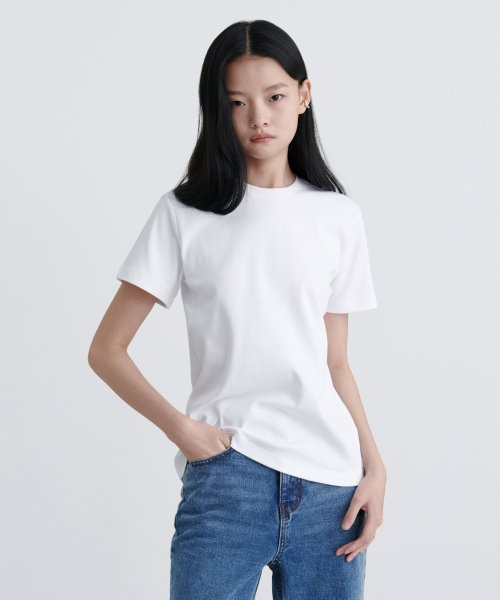

100%|██████████| 1/1 [00:00<00:00,  9.62it/s]
Insert of existing embedding ID: 
상의 > 반소매 티셔츠

            (무신사 스탠다드)        

Add of existing embedding ID: 
상의 > 반소매 티셔츠

            (무신사 스탠다드)        



1 finish
캐시미어 블렌드 오버사이즈 싱글 코트 [블랙]
<span class="product_article_price" id="goods_price">
<del class="price-del">159,900원</del>
</span>


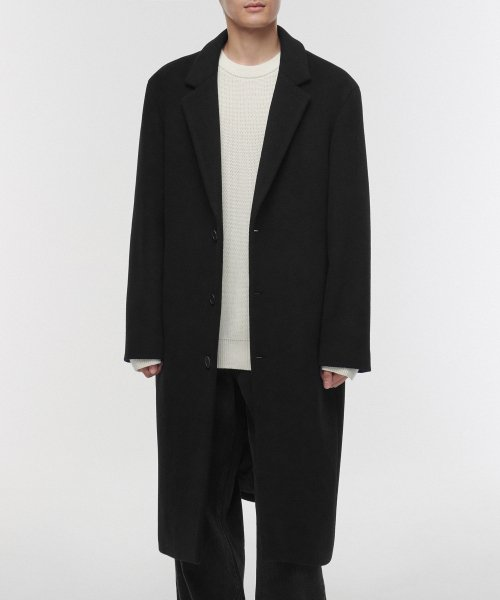

100%|██████████| 1/1 [00:00<00:00,  8.26it/s]


1 finish
레이어드 크루 넥 반팔 티셔츠_일반 기장 2팩
<span class="product_article_price" id="goods_price">
                                                                                                                                                33,800원
                    </span>


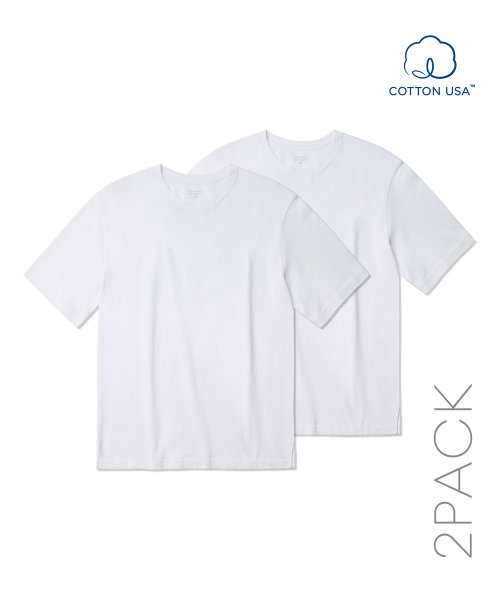

100%|██████████| 1/1 [00:00<00:00,  9.80it/s]
Insert of existing embedding ID: 
상의 > 반소매 티셔츠

            (무신사 스탠다드)        

Add of existing embedding ID: 
상의 > 반소매 티셔츠

            (무신사 스탠다드)        



1 finish
후디드 스웨트 집업 [멜란지 그레이]
<span class="product_article_price" id="goods_price">
                                                                                                                                                43,900원
                    </span>


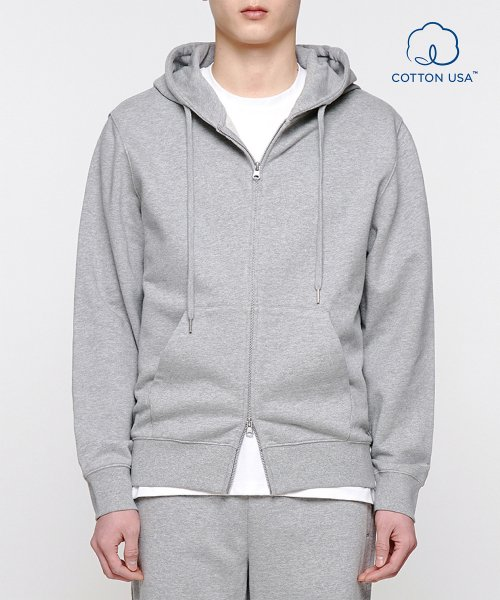

100%|██████████| 1/1 [00:00<00:00,  9.01it/s]


1 finish
크루 삭스 7팩 [화이트]
<span class="product_article_price" id="goods_price">
                                                                                                                                                22,900원
                    </span>


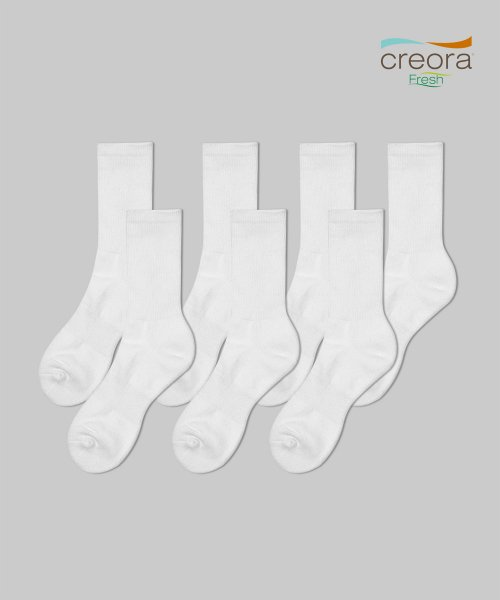

100%|██████████| 1/1 [00:00<00:00,  9.52it/s]
Insert of existing embedding ID: 
양말/레그웨어 > 양말

            (무신사 스탠다드)        

Add of existing embedding ID: 
양말/레그웨어 > 양말

            (무신사 스탠다드)        



1 finish
[힛탠다드 이벤트] [힛탠다드] 우먼즈 크루 넥 티셔츠_이너 웨어 [블랙]
<span class="product_article_price">13,900</span>


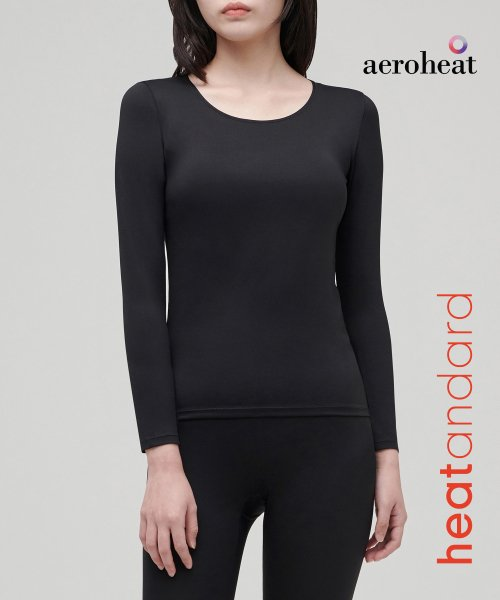

100%|██████████| 1/1 [00:00<00:00,  9.43it/s]
Insert of existing embedding ID: 
속옷 > 홈웨어

            (무신사 스탠다드)        

Add of existing embedding ID: 
속옷 > 홈웨어

            (무신사 스탠다드)        



1 finish
무신사 스탠다드 하의용 옷걸이 8팩 [블랙]
<span class="product_article_price" id="goods_price">
<del class="price-del">15,900원</del>
</span>


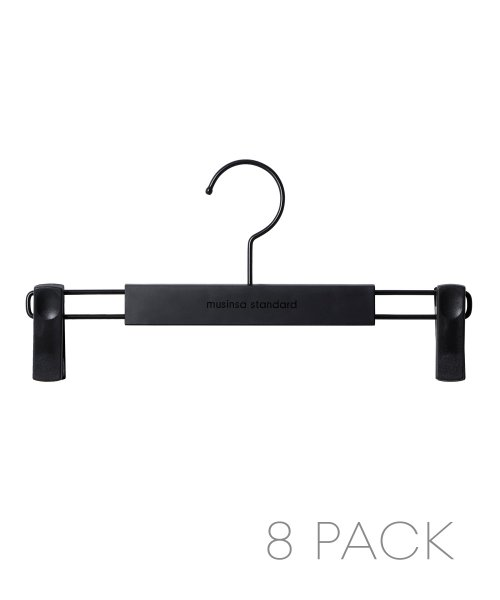

  0%|          | 0/1 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [28]:
for start in range(1,20):
    crawl(start) 

In [ ]:
df = pd.DataFrame({'상품명': title_list, 'url': url_list, '가격': price_list})
df.to_csv('무신사.csv', encoding='utf-8-sig')